In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

# sigmoid function used to range cost function difference values from 0 to 1
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

# vectorizing of sigmoid function such that it is applicable across numpy arrays
f = np.vectorize(sigmoid)

# importation of sufficiency and necessity values from .csv file into multidimensional numpy array
suffTest = np.genfromtxt('/Users/marshall/Desktop/fiddle/FIDDLE_alpha/results/test4/SufficiencyCosts.csv', delimiter=',')
necTest = np.genfromtxt('/Users/marshall/Desktop/fiddle/FIDDLE_alpha/results/test4/NecessityCosts.csv', delimiter=',')

/Users/marshall/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Extraction done by accessing column corresponding to output type, then grabbing all values 
# in rows from index 1 to index "length" of column ...

# extraction of combined inputs and combined nullified inputs loss function data
allACTIVE = necTest[:,1][1:len(necTest[:,1])] # arbitrarily, the combined loss function came from the nec.csv file
noneACTIVE = suffTest[:,5][1:len(suffTest[:,5])] # arbitrarily, the random loss function came from the succ.csv file
# extraction of sufficiency scores from numpy array
chipSEQ_preSuff = suffTest[:,1][1:len(suffTest[:,1])]
dnaSEQ_preSuff = suffTest[:,2][1:len(suffTest[:,2])]
mnaseSEQ_preSuff = suffTest[:,3][1:len(suffTest[:,3])]
netSEQ_preSuff = suffTest[:,4][1:len(suffTest[:,4])]
rnaSEQ_preSuff = suffTest[:,6][1:len(suffTest[:,6])]
randInp_preSuff = suffTest[:,7][1:len(suffTest[:,7])]
tssSEQ_preSuff = suffTest[:,8][1:len(suffTest[:,8])]
# extraction of necessity scores from numpy array
chipSEQ_preNec = necTest[:,2][1:len(necTest[:,2])]
dnaSEQ_preNec = necTest[:,3][1:len(necTest[:,3])]
mnaseSEQ_preNec = necTest[:,4][1:len(necTest[:,4])]
netSEQ_preNec = necTest[:,5][1:len(necTest[:,5])]
rnaSEQ_preNec = necTest[:,6][1:len(necTest[:,6])]
randInp_preNec = necTest[:,7][1:len(necTest[:,7])]
tssSEQ_preNec = necTest[:,8][1:len(necTest[:,8])]

In [4]:
# Application of sigmoid normalization function to extracted data:
#     L(x) = allACTIVE

# calculation of normalized sufficiency scores according to:
# S(x) = sigma(L+d(x) - L(x))
chipSEQ_suff = f(np.subtract(chipSEQ_preSuff, allACTIVE).astype(float))
dnaSEQ_suff = f(np.subtract(dnaSEQ_preSuff, allACTIVE).astype(float))
mnaseSEQ_suff = f(np.subtract(mnaseSEQ_preSuff, allACTIVE).astype(float))
netSEQ_suff = f(np.subtract(netSEQ_preSuff, allACTIVE).astype(float))
rnaSEQ_suff = f(np.subtract(rnaSEQ_preSuff, allACTIVE).astype(float))
randInp_suff = f(np.subtract(randInp_preSuff, allACTIVE).astype(float))
tssSEQ_suff = f(np.subtract(tssSEQ_preSuff, allACTIVE).astype(float))
# calculation of normalized necessity scores according to:
# N(x) = sigma(L-d(x) - L(x))
chipSEQ_nec = f(np.subtract(chipSEQ_preNec, allACTIVE).astype(float))
dnaSEQ_nec = f(np.subtract(dnaSEQ_preNec, allACTIVE).astype(float))
mnaseSEQ_nec = f(np.subtract(mnaseSEQ_preNec, allACTIVE).astype(float))
netSEQ_nec = f(np.subtract(netSEQ_preNec, allACTIVE).astype(float))
rnaSEQ_nec = f(np.subtract(rnaSEQ_preNec, allACTIVE).astype(float))
randInp_nec = f(np.subtract(randInp_preNec, allACTIVE).astype(float))
tssSEQ_nec = f(np.subtract(tssSEQ_preNec, allACTIVE).astype(float))

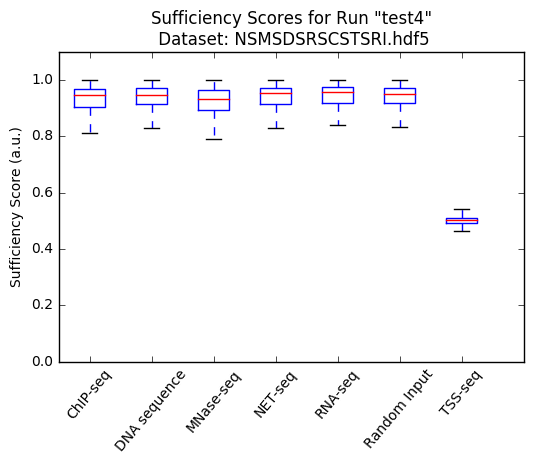

In [5]:
# Boxplotting of data
data1 = [chipSEQ_suff, dnaSEQ_suff, mnaseSEQ_suff, netSEQ_suff, rnaSEQ_suff, randInp_suff, tssSEQ_suff]
plt.boxplot(data1, 0, '')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['ChIP-seq', 'DNA sequence', 'MNase-seq', 'NET-seq', 'RNA-seq', 'Random Input', 'TSS-seq'], rotation=50)
plt.ylabel('Sufficiency Score (a.u.)')
plt.title('Sufficiency Scores for Run "test4"\n Dataset: NSMSDSRSCSTSRI.hdf5')
plt.ylim(0, 1.1)
plt.show()

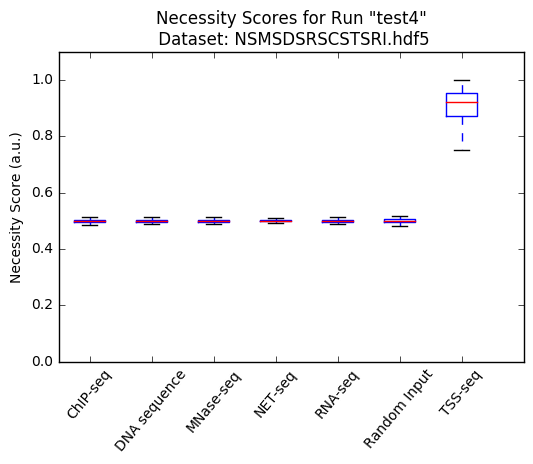

In [6]:
# Boxplotting of data
data2 = [chipSEQ_nec, dnaSEQ_nec, mnaseSEQ_nec, netSEQ_nec, rnaSEQ_nec, randInp_nec, tssSEQ_nec]
plt.boxplot(data2, 0, '')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['ChIP-seq', 'DNA sequence', 'MNase-seq', 'NET-seq', 'RNA-seq', 'Random Input', 'TSS-seq'], rotation=50)
plt.ylabel('Necessity Score (a.u.)')
plt.title('Necessity Scores for Run "test4"\n Dataset: NSMSDSRSCSTSRI.hdf5')
plt.ylim(0, 1.1)
plt.show()